## Notebook to study the spectrum of $\Phi$ values for the entire corpus

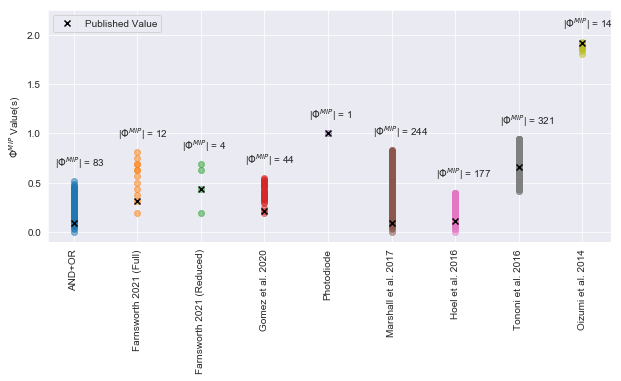

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')
%matplotlib inline

## Read in Data
gomez = pd.read_csv("results/phi_spectrum_gomez_2021.csv",header=None,squeeze=True)
hoel = pd.read_csv("results/phi_spectrum_hoel_2016.csv",header=None,squeeze=True)
farnsworth_full = pd.read_csv("results/phi_spectrum_farnsworth_full.csv",header=None,squeeze=True)
farnsworth_reduced = pd.read_csv("results/phi_spectrum_farnsworth_reduced.csv",header=None,squeeze=True)
oizumi = pd.read_csv("results/phi_spectrum_oizumi_2014.csv",header=None,squeeze=True)
marshall = pd.read_csv("results/phi_spectrum_marshall_2017.csv",header=None,squeeze=True)
and_or = pd.read_csv("results/phi_spectrum_and_or.csv",header=None,squeeze=True)
photodiode = pd.read_csv("results/phi_spectrum_photodiode.csv",header=None,squeeze=True)
tononi = pd.read_csv("results/phi_spectrum_tononi_2016.csv",header=None,squeeze=True)
tononi
# hanson

# ## Create Dict with 'Key':[Phi_MIP_values, Published Value]

data_dict = {'AND+OR':[and_or,0.090278], 'Farnsworth 2021 (Full)':[farnsworth_full,0.3125], 
             'Farnsworth 2021 (Reduced)':[farnsworth_reduced,0.4375], 'Gomez et al. 2020':[gomez,0.215278], 
             'Photodiode':[photodiode,1.0000], 'Marshall et al. 2017':[marshall,0.090278], 
             'Hoel et al. 2016':[hoel, 0.11389], 'Tononi et al. 2016':[tononi, 0.659722],
             'Oizumi et al. 2014':[oizumi,1.916665]}

#### Plot

## Initialize fig, ax objects
fig = plt.figure(figsize=(8.8,5.4))
ax = plt.subplot(111)

index = 0
for key in data_dict.keys():
    size_of_Phi = len(data_dict[key][0]) ## number of degenerate Phi MIP values
    plt.scatter([index]*size_of_Phi,data_dict[key][0],alpha=0.5,label=None)
    if index == 0:
        plt.scatter([index],data_dict[key][1],marker='x',color='black',label='Published Value') # with label
    else:
        plt.scatter([index],data_dict[key][1],marker='x',color='black')   # no label
        
    plt.annotate(r'|$\Phi^{MIP}$| = '+str(size_of_Phi),(index-0.3,np.max(data_dict[key][0])+0.15))
    index=index+1
    
## Clean Up
plt.ylabel(r'$\Phi^{MIP}$ Value(s)')
plt.xticks(np.arange(len(data_dict)),data_dict.keys(),rotation=90)
plt.legend(loc='upper left')
plt.ylim((-0.1,2.25))
plt.tight_layout()
plt.savefig('Phi_MIP_Corpus.pdf')
plt.show()

In [35]:
np.arange(len(data_dict))
data_dict.keys()

dict_keys(['Gomez et al. 2020', 'Hoel et al. 2016', 'Farnsworth 2021 (Full)', 'Farnsworth 2021 (Reduced)', 'Oizumi et al. 2014', 'Marshall et al. 2017', 'AND+OR', 'Photodiode'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.scatter([i]*len(Phi_Spectrum[1][i]),Phi_Spectrum[1][i],alpha=0.5)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns




from pyphi import models
sns.set_style('darkgrid')
%matplotlib inline

## UTF Characters
LINE = "\u2501"
CUT_SYMBOL = LINE * 2 + "/ /" + LINE * 2 + "\u27A4"

## Set Font
# font_path = '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
font_path = '/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
font = mfm.FontProperties(fname=font_path) # find this font

## Initialize fig, ax objects
fig = plt.figure(figsize=(8.8,5.4))
ax = plt.subplot(111)

## Plot published value and possible values
plt.plot([0],pyphi_val,'kx',label=r'Published Value')
ax.axhspan(np.min(Phi_MIP), np.max(Phi_MIP), alpha=0.15,color='black',label='Possible Values')
# ax.axhspan(np.min(Phi_MIP), np.max(Phi_MIP), alpha=0.15,color='black',label='Possible $\Phi^{Max}$ Values')

## Scatterplot Phi Values for each cut
x_labels = []
for i in range(len(Phi_Spectrum[0])):
    cut = Phi_Spectrum[0][i]
    
    ## Get label for cut
    from_nodes = models.fmt.fmt_mechanism(cut.from_nodes, cut.node_labels)
    to_nodes = models.fmt.fmt_mechanism(cut.to_nodes, cut.node_labels)
    cut_label = from_nodes+CUT_SYMBOL+to_nodes
    
    ## Plot
    plt.scatter([i]*len(Phi_Spectrum[1][i]),Phi_Spectrum[1][i],alpha=0.5)
    x_labels.append(cut_label)
    
## Clean Up
plt.title('Hoel et al. 2016 (0000)')
plt.ylabel(r'$\Phi$ Value(s)',fontsize=12)
plt.xticks(range(len(Phi_Spectrum[0])),x_labels,rotation=90,fontproperties=font)
plt.ylim((-0.0,0.6))
plt.legend()
# plt.legend(ncol=1,bbox_to_anchor = [1.25,1.0],prop=font,fontsize=12)
plt.tight_layout()
# plt.savefig("Hoel_2016_OFF.pdf")
plt.show()